
# **Running Hive on Pyspark in Colab**

Prepare PySpark Cluster

In [1]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment.
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Run a local spark session to test your installation:

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
#spark = SparkSession.builder.master("local[*]").getOrCreate()
spark = SparkSession.builder.master("local[*]").enableHiveSupport().getOrCreate()


#Show Existing **Databases**

In [3]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [4]:
# Task: Delete the "bostonh" database
database_name = "bostonh"
drop_database_query = f"DROP DATABASE IF EXISTS {database_name} CASCADE"

# Execute the query using spark.sql
#spark.sql(drop_database_query)


#Create a New Database

In [5]:
spark.sql("CREATE DATABASE BostonH")

DataFrame[]

In [6]:
spark.sql("show databases").show()

+---------+
|namespace|
+---------+
|  bostonh|
|  default|
+---------+



# Upload Data to Working Directory

In [7]:
from google.colab import files
files.upload()

Saving BostonHousing.csv to BostonHousing (1).csv


{'BostonHousing (1).csv': b'"crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","b","lstat","medv"\n0.00632,18,2.31,"0",0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n0.02731,0,7.07,"0",0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n0.02729,0,7.07,"0",0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n0.03237,0,2.18,"0",0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n0.06905,0,2.18,"0",0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n0.02985,0,2.18,"0",0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n0.08829,12.5,7.87,"0",0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n0.14455,12.5,7.87,"0",0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n0.21124,12.5,7.87,"0",0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n0.17004,12.5,7.87,"0",0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n0.22489,12.5,7.87,"0",0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n0.11747,12.5,7.87,"0",0.524,6.009,82.9,6.2267,5,311,15.2,396.9,13.27,18.9\n0.0937

# Load Data to Spark Cluster

In [8]:
dataset = spark.read.csv('BostonHousing.csv',inferSchema=True, header =True)

In [9]:
dataset.show()

+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575| 65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421| 78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185| 61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998| 45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147| 54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
|0.02985| 0.0| 2.18|   0|0.458| 6.43| 58.7|6.0622|  3|222|   18.7|394.12| 5.21|28.7|
|0.08829|12.5| 7.87|   0|0.524|6.012| 66.6|5.5605|  5|311|   15.2| 395.6|12.43|22.9|
|0.14455|12.5| 7.87|   0|0.524|6.172| 96.1|5.9505|  5|311|   15.2| 396.9|19.15|27.1|
|0.21124|12.5| 7.87|   0|0.524|5.631|100.0|6.0821|  5|311|   15.2

# Save dataset to a new table in Hive

In [10]:

dataset.write.mode("overwrite").saveAsTable("bostonh.bos_housing")


# Show data from Hive Table

In [11]:
dataset.show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



In [12]:
# Task 1: Retrieve and display the first 5 rows of the dataset
dataset = spark.sql("SELECT * FROM bostonh.bos_housing LIMIT 5")
dataset.show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



In [13]:
# Task 1: Find and report the total number of records in the dataset
total_records = spark.sql("SELECT COUNT(*) AS total_records FROM bostonh.bos_housing").collect()[0]["total_records"]
print("Total number of records in the dataset:", total_records)

Total number of records in the dataset: 506


In [16]:
#Basic statistics for the "medv" column
medv_stats = spark.sql("""
SELECT
    AVG(medv) AS mean_medv,
    STDDEV(medv) AS stddev_medv,
    MIN(medv) AS min_medv,
    MAX(medv) AS max_medv
FROM bostonh.bos_housing
""")
medv_stats.show()

+------------------+-----------------+--------+--------+
|         mean_medv|      stddev_medv|min_medv|max_medv|
+------------------+-----------------+--------+--------+
|22.532806324110698|9.197104087379815|     5.0|    50.0|
+------------------+-----------------+--------+--------+



In [15]:
#Mean "rm"
mean_rm = spark.sql("""
SELECT
    AVG(rm) AS mean_rm
FROM bostonh.bos_housing
""")
mean_rm.show()

+-----------------+
|          mean_rm|
+-----------------+
|6.284634387351787|
+-----------------+



In [17]:
#Property with highest crime rate
highest_crime_property = spark.sql("""
SELECT *
FROM bostonh.bos_housing
ORDER BY crim DESC
LIMIT 1
""")
highest_crime_property.show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



In [18]:
#property with the lowest median home value
lowest_medv_property = spark.sql("""
SELECT *
FROM bostonh.bos_housing
ORDER BY medv ASC
LIMIT 1
""")
lowest_medv_property.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



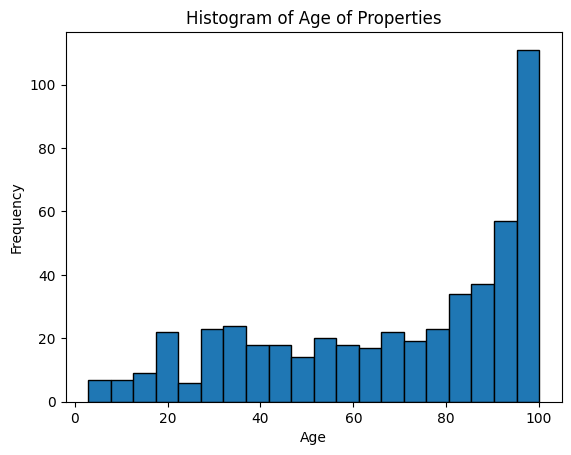

In [19]:
#histogram of distribution of the "age" column.
import matplotlib.pyplot as plt

# Retrieve the age column
age_data = spark.sql("SELECT age FROM bostonh.bos_housing").toPandas()

# Plot the histogram
plt.hist(age_data['age'], bins=20, edgecolor='black')
plt.title("Histogram of Age of Properties")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [20]:
#percentage of properties with a "chas" value of 1
total_properties = spark.sql("SELECT COUNT(*) as total FROM bostonh.bos_housing").collect()[0]["total"]

# Number of properties with chas = 1
chas_properties = spark.sql("SELECT COUNT(*) as count_chas FROM bostonh.bos_housing WHERE chas = 1").collect()[0]["count_chas"]

# Calculate the percentage
percentage_chas = (chas_properties / total_properties) * 100
print(f"Percentage of properties near the Charles River (chas = 1): {percentage_chas:.2f}%")

Percentage of properties near the Charles River (chas = 1): 6.92%


In [21]:
#correlation coefficient between "rm" and "medv"
corr_rm_medv = spark.sql("SELECT corr(rm, medv) as correlation FROM bostonh.bos_housing").collect()[0]["correlation"]
print(f"Correlation coefficient between 'rm' and 'medv': {corr_rm_medv:.2f}")

Correlation coefficient between 'rm' and 'medv': 0.70


In [22]:
#correlation coefficient between "ptratio" and "nox"
corr_ptratio_nox = spark.sql("SELECT corr(ptratio, nox) as correlation FROM bostonh.bos_housing").collect()[0]["correlation"]
print(f"Correlation coefficient between 'ptratio' and 'nox': {corr_ptratio_nox:.2f}")

Correlation coefficient between 'ptratio' and 'nox': 0.19


In [23]:
#top 5 neighborhoods with the highest median home values
top_5_neighborhoods_query = """
SELECT
    zn AS neighborhood,
    medv
FROM
    bostonh.bos_housing
ORDER BY
    medv DESC
LIMIT 5
"""

top_5_neighborhoods = spark.sql(top_5_neighborhoods_query)
top_5_neighborhoods.show()


+------------+----+
|neighborhood|medv|
+------------+----+
|         0.0|50.0|
|        80.0|50.0|
|         0.0|50.0|
|         0.0|50.0|
|         0.0|50.0|
+------------+----+



In [24]:
#Average propoerty age for neighbourhood based on "chas"
average_age_chas_query = """
SELECT
    chas,
    AVG(age) AS avg_age
FROM
    bostonh.bos_housing
GROUP BY
    chas
"""

# Execute the query
average_age_chas = spark.sql(average_age_chas_query)
average_age_chas.show()

+----+-----------------+
|chas|          avg_age|
+----+-----------------+
|   1|77.50000000000001|
|   0|67.91167728237794|
+----+-----------------+



In [25]:
#Creating Hive View
create_view_query = """
CREATE VIEW property_age_view AS
SELECT
    age,
    medv
FROM
    bostonh.bos_housing
"""

# Execute the query
spark.sql(create_view_query)

DataFrame[]

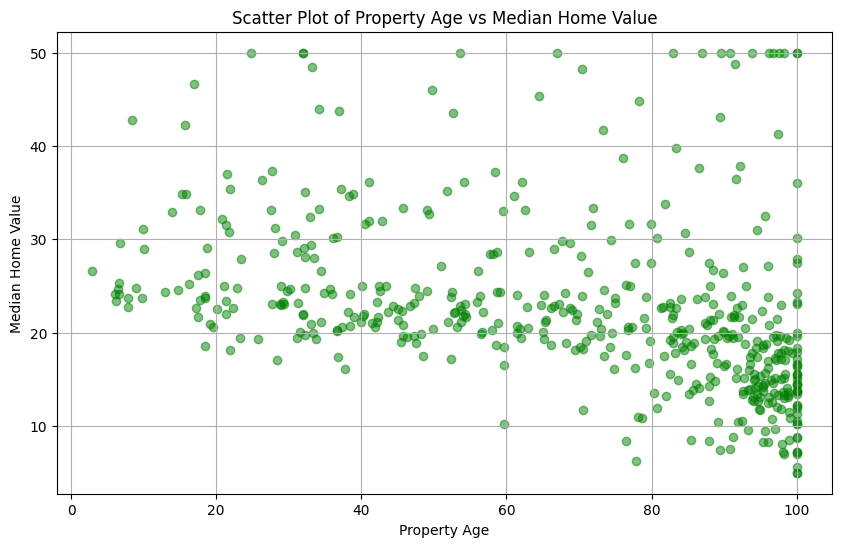

In [29]:
import matplotlib.pyplot as plt

# Retrieve the data from the Hive view
property_age_view_df = spark.sql("SELECT * FROM property_age_view")

# Convert the Spark DataFrame to a Pandas DataFrame for visualization
property_age_view_pd_df = property_age_view_df.toPandas()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(property_age_view_pd_df["age"], property_age_view_pd_df["medv"], alpha=0.5, c='green')
plt.title('Scatter Plot of Property Age vs Median Home Value')
plt.xlabel('Property Age')
plt.ylabel('Median Home Value')
plt.grid(True)
plt.show()

In [27]:
identify_outliers_query = """
SELECT *
FROM bostonh.bos_housing
WHERE crim > 10
"""

# Execute the query
outliers_df = spark.sql(identify_outliers_query)

# Display the results
outliers_df.show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

In [31]:
hypothesis_test_query = """
SELECT
    corr(rm, medv) AS correlation_coefficient,
    CASE
        WHEN corr(rm, medv) IS NOT NULL AND abs(corr(rm, medv)) >= 0.5 THEN 'Strong Relationship'
        WHEN corr(rm, medv) IS NOT NULL AND abs(corr(rm, medv)) < 0.5 THEN 'Weak Relationship'
        ELSE 'No Significant Relationship'
    END AS relationship_strength
FROM
    bostonh.bos_housing
"""

results_df = spark.sql(hypothesis_test_query)

results_df.show()

+-----------------------+---------------------+
|correlation_coefficient|relationship_strength|
+-----------------------+---------------------+
|     0.6953599470715401|  Strong Relationship|
+-----------------------+---------------------+

